In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/interim/filtered.csv").drop(["Unnamed: 0"], axis =1)

### Verificacao da doenca

#### Diagnóstico official de Parksion -- "Do you currently have a diagnosis of Parkinson's disease, or parkinsonism, by a physician or other health care professional (most recent PD diagnosis)

In [3]:
df["CurrPDDiag"].unique()

array([ 0.,  1., nan])

In [4]:
df["CurrPDDiag"].value_counts()

1.0    33285
0.0    12865
Name: CurrPDDiag, dtype: int64

In [5]:
df = df.query("CurrPDDiag == 1.0")

In [6]:
df.drop(["CurrPDDiag", 'Health', "HealthPNA", "compbypa"], axis =1, inplace=True)

In [7]:
df

,age,Mobility,Care,Active,Pain,Anxious,CGIPD,Anxiety,AnxietyDia,AnxietyAge,...,pa4c,pa5a,pa5b,pa5c,pa6a,pa6b,pa6c,pa7a,pa7b,pa7c
1,82.1,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.3,2.0,1.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.4,1.0,0.0,1.0,3.0,2.0,NaN,1.0,1.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,87.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,62.8,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46146,62.1,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46148,81.2,4.0,4.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46149,70.1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46150,67.6,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.fillna('-1')

In [9]:
col = df.columns

for i in col:
    df[i] = pd.to_numeric(df[i])

In [10]:
### Colunas sobree informacoes pessoais

df.drop(['ABRGYouExLight', 'ABRGYouExMod', 'ABRGYouExStren', 'ABRGYouExMuscle',
       'ABRGYouExOther', 'ABRGYouExPTNA', 'ABRGYouExAffPhysical',
       'ABRGYouExAffBenefit', 'ABRGYouExAffInterest', 'ABRGYouExAffAccess',
       'ABRGYouExAffTime', 'ABRGYouExAffEnjoy', 'ABRGYouExAffAgainst',
       'ABRGYouExAffSafety', 'ABRGYouExAffOther', 'ABRGYouExAffNone',
       'ABRGYouExAffPTNA', 'ABRGPDReImproEx',
       'ABRGYouExOften'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33285 entries, 1 to 46151
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       33285 non-null  float64
 1   Mobility                  33285 non-null  float64
 2   Care                      33285 non-null  float64
 3   Active                    33285 non-null  float64
 4   Pain                      33285 non-null  float64
 5   Anxious                   33285 non-null  float64
 6   CGIPD                     33285 non-null  float64
 7   Anxiety                   33285 non-null  float64
 8   AnxietyDia                33285 non-null  float64
 9   AnxietyAge                33285 non-null  float64
 10  AnxietyStat               33285 non-null  float64
 11  Depress                   33285 non-null  float64
 12  DepressDia                33285 non-null  float64
 13  DepressAge                33285 non-null  float64
 14  Depres

### Correlacao entre as colunas

In [12]:
df.columns

Index(['age', 'Mobility', 'Care', 'Active', 'Pain', 'Anxious', 'CGIPD',
       'Anxiety', 'AnxietyDia', 'AnxietyAge', 'AnxietyStat', 'Depress',
       'DepressDia', 'DepressAge', 'DepressStat', 'DepressionHx',
       'DepressionHxTrt', 'DepressionHxLim', 'AnxietyHx', 'AnxietyHxTrt',
       'AnxietyHxLim', 'LeisureDay', 'LeisureHours', 'WalkDay', 'WalkHours',
       'LightSportDay', 'LightSportHours', 'ModSportDay', 'ModSportHours',
       'StrenSportDay', 'StrenSportHours', 'StrengthDay', 'StrengthHours',
       'HouseLight', 'HouseHeavy', 'HouseRepair', 'HouseLawn', 'HouseGarden',
       'HouseCare', 'Work', 'WorkActive', 'MindStress',
       'MindAnxietyPDSympTremor', 'MindAnxietyPDSympWalk',
       'MindAnxietyPDSympSlow', 'MindAnxietyPDSympExcess',
       'MindAnxietyPDSympDepress', 'MindAnxietyPDSympSleep',
       'MindAnxietyPDSympOther', 'rslt', 'pa1a', 'pa1b', 'pa1c', 'pa2a',
       'pa2b', 'pa2c', 'pa3a', 'pa3b', 'pa3c', 'pa4a', 'pa4b', 'pa4c', 'pa5a',
       'pa5b', 'pa5c', '

In [13]:
len(df.columns)

71

In [14]:
auxx=df[['Mobility', 'Care', 'Active', 'Pain', 'Anxious', 'CGIPD',
       'Anxiety']]

In [15]:
auxx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33285 entries, 1 to 46151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mobility  33285 non-null  float64
 1   Care      33285 non-null  float64
 2   Active    33285 non-null  float64
 3   Pain      33285 non-null  float64
 4   Anxious   33285 non-null  float64
 5   CGIPD     33285 non-null  float64
 6   Anxiety   33285 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


In [16]:
a = df.columns

In [17]:
a = df.columns[0:10]

0 10


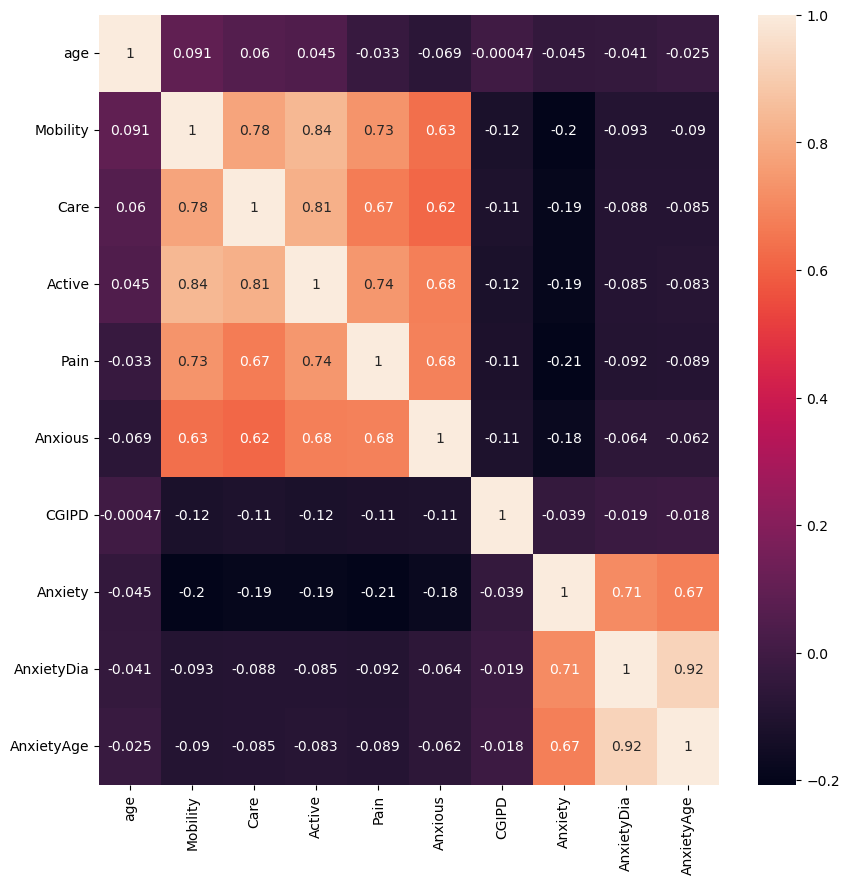

10 20


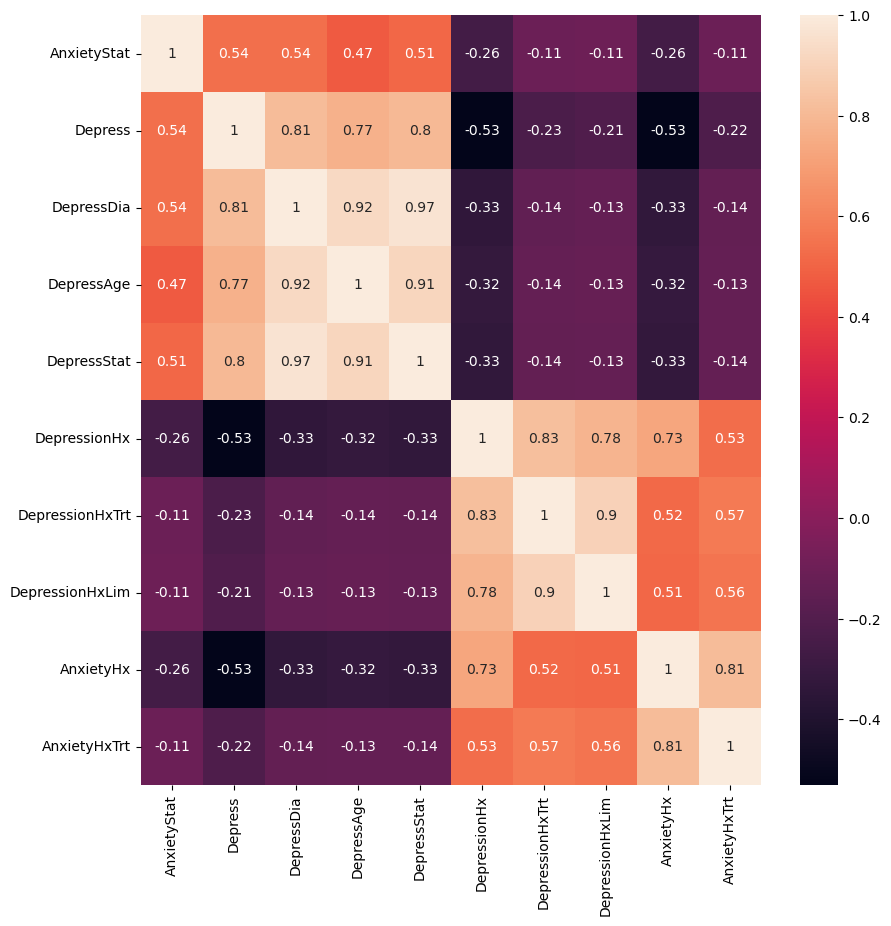

20 30


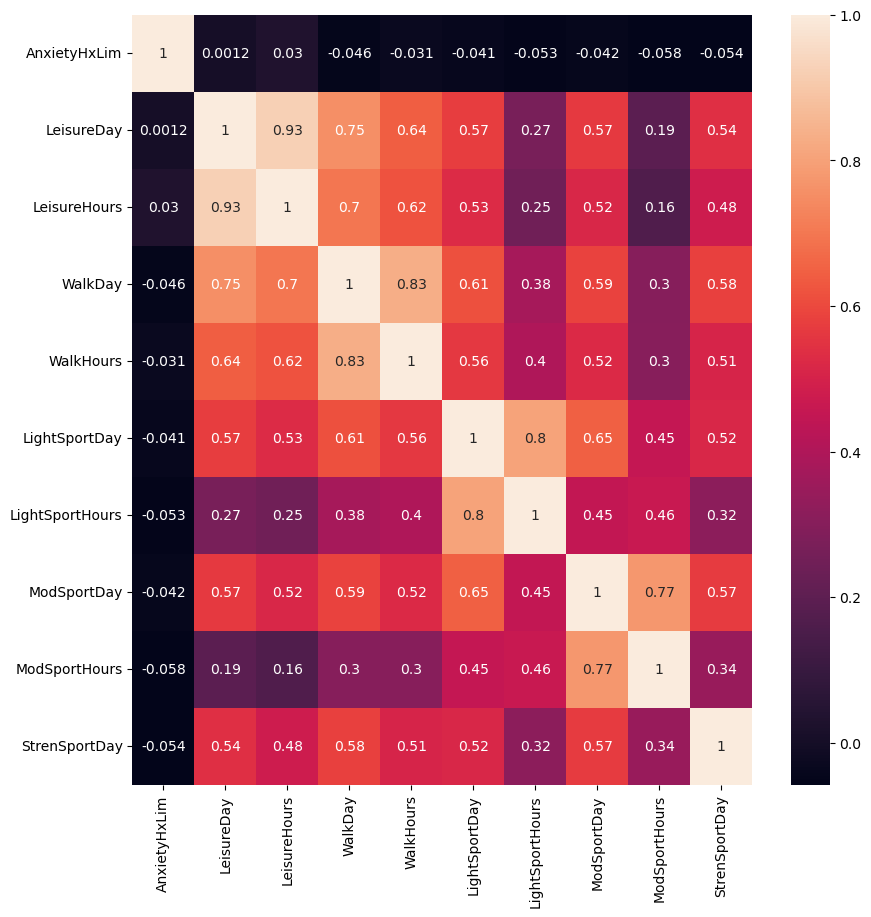

30 40


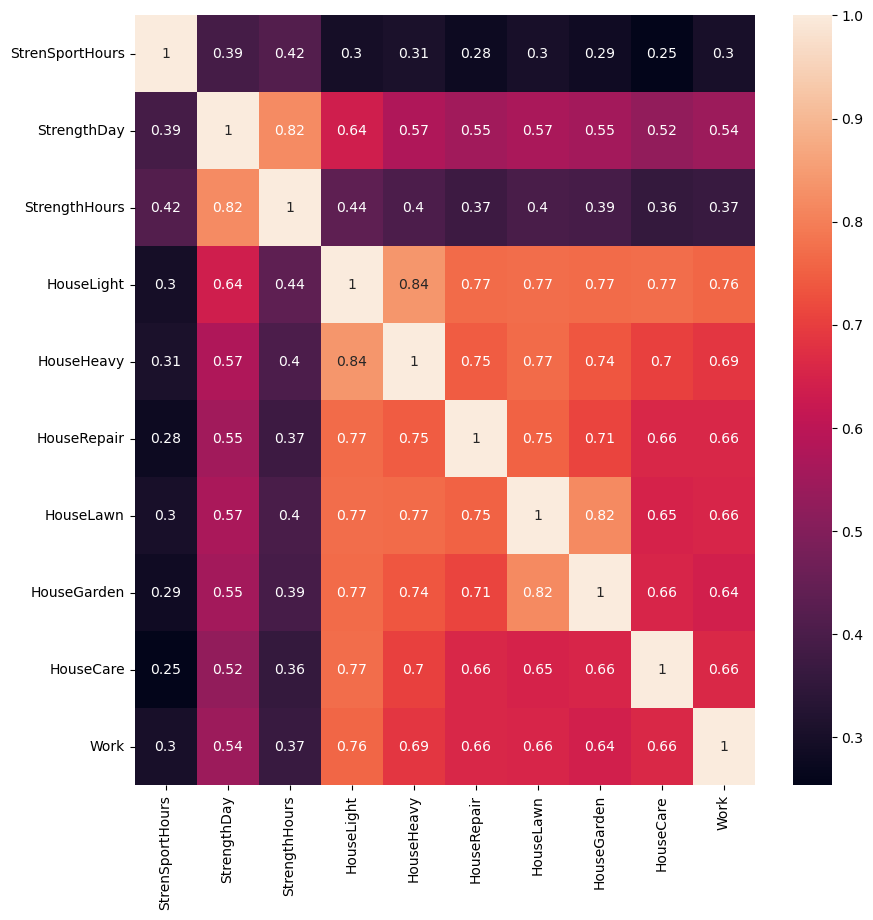

40 50


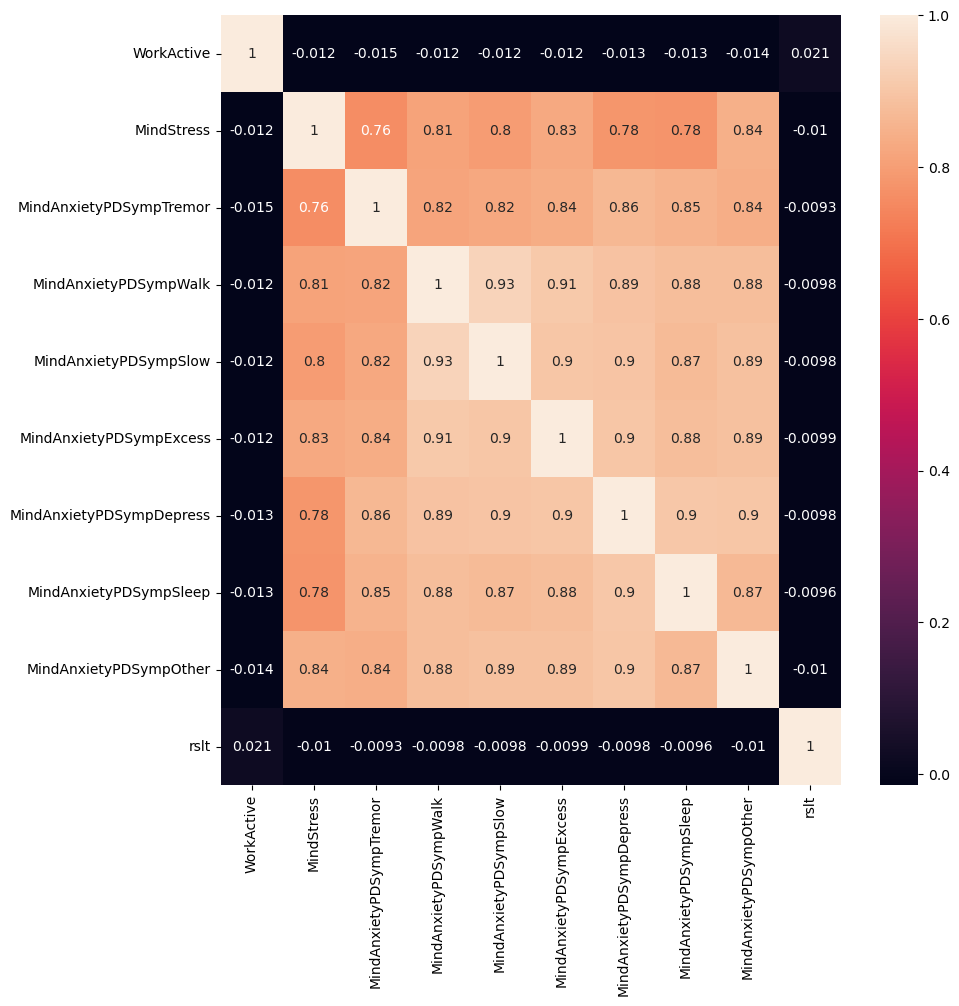

50 60


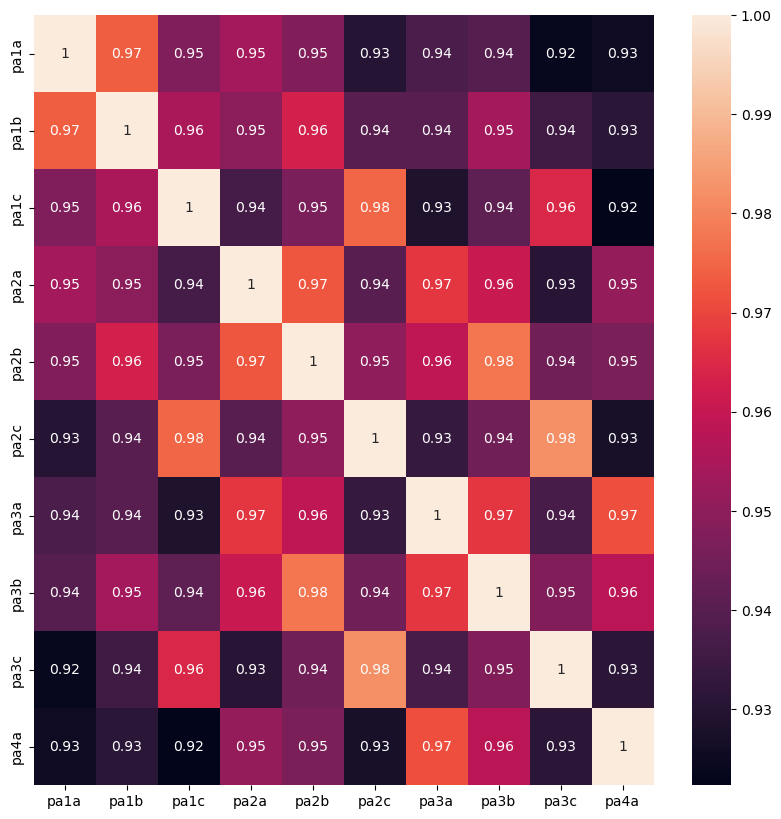

60 70


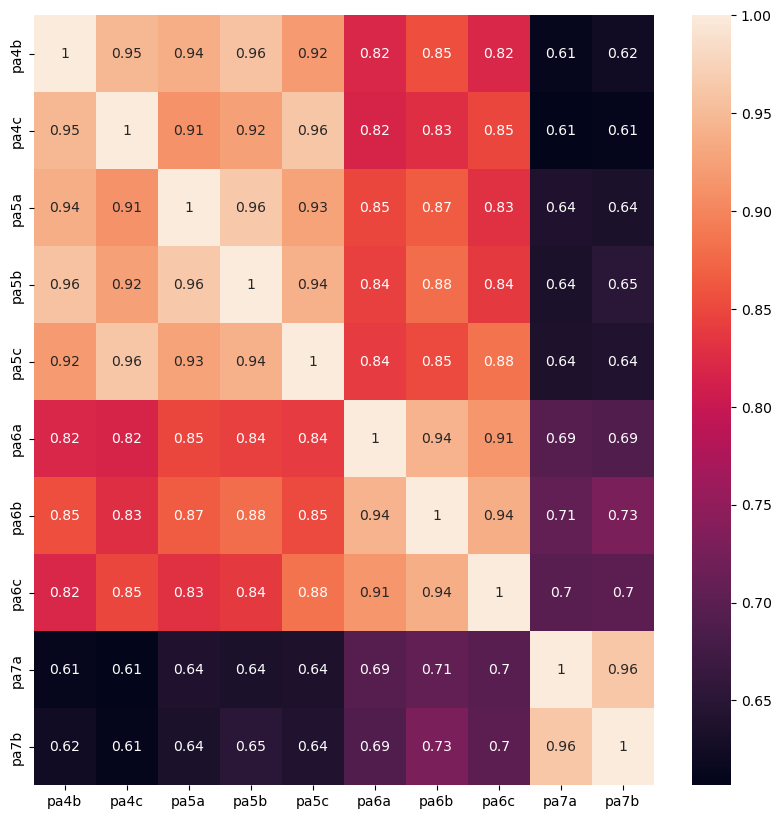

70 80


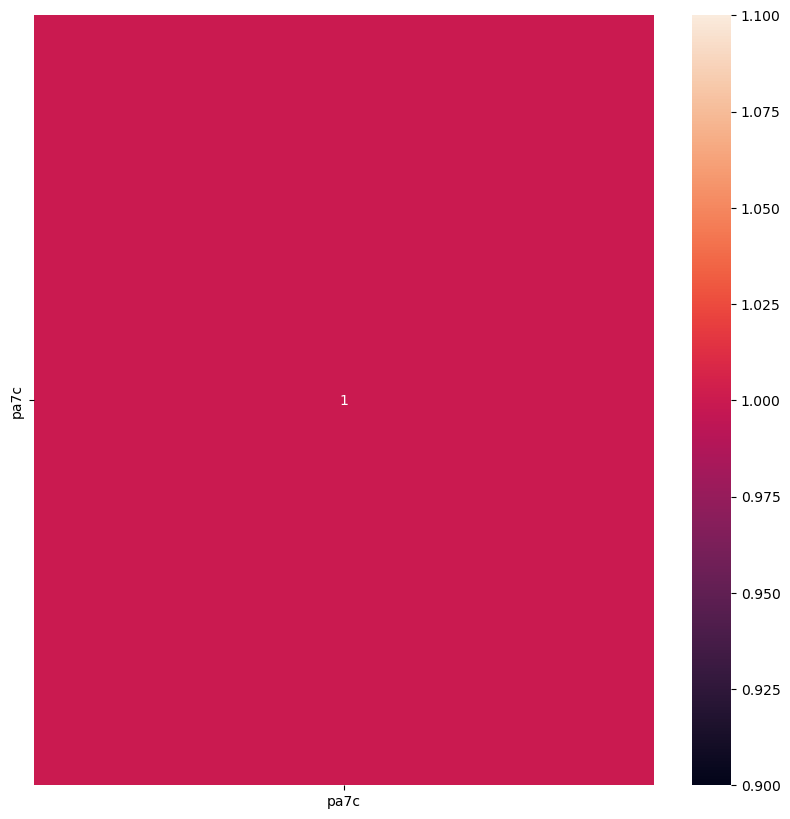

In [18]:
for i in range(0, len(df.columns), 10):
    col = df.columns[i:i+10]
    aux = df[col]
    print(i, i+10)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(data=aux.corr(),annot=True,)
    plt.savefig("../assets/heatmap/heatmap_" +str(i)+ ".jpg")
    plt.show() 

Correlacao maiores que 90% podem ser consideradas mmuito parecidas, e a partir disso diminuir o número de colunas para não ficar repetitivo e afetar o algoritmo final, portanto as colunas:

. 'AnxietyDia' e 'AnxietyAge'  - 92%

. 'DepressDia' e 'DepressAge' - 92%

. 'DepressDia' e 'DepressionStat' - 97%

. 'DepressAge' e 'DepressStat' - 91%

. 'LeisureHours' e 'LeisureDay' - 93%

. 'pa1a' , 'pa1b' , 'pa2a' , 'pa2c' , 'pa3a' , 'pa3b'

. 'pa3c' , 'pa4b' , 'pa5a' , 'pa5c'

. 'pa6b' , 'pa6a' , 'pa6c'

. 'pa7a' , 'pa7b' , 'pa7c'

. 'MindAnxietyPDSympWalk', 'MindAnxietyPDSympSlow', 'MindAnxietyPDSympExcess'

. 'pa1a' , 'pa1c' , 'pa2b', 'pa4a', 'pa3c', 'pa4c', 'pa5b', 'rslt'      

.  'MindAnxietyPDSympSlow', 'MindAnxietyPDSympDepress',  'MindAnxietyPDSympSleep', 'MindAnxietyPDSympWalk'

. 'Anxiety' , 'Depress'

In [19]:
### Colunas sobree informacoes pessoais

df.drop(['AnxietyAge', 'DepressDia', 
         'DepressDia', 'DepressStat', 'DepressAge', 'DepressStat',
          'LeisureDay',  'pa1b' , 'pa2a' , 'pa2c' , 'pa3a' , 'pa3b', 
         'pa4b' , 'pa5a' , 'pa5c', 'pa6b' , 'pa6a' , 'pa6c', 
          'pa7b' , 'pa7c', 'MindAnxietyPDSympWalk', 'AnxietyStat', 'MindAnxietyPDSympExcess',
         'pa1c' , 'pa2b', 'pa4a', 'pa3c', 'pa4c', 'pa5b', 'rslt', 
         'MindAnxietyPDSympSlow', 'MindAnxietyPDSympDepress', 'Anxiety'], axis=1, inplace=True)

0 10


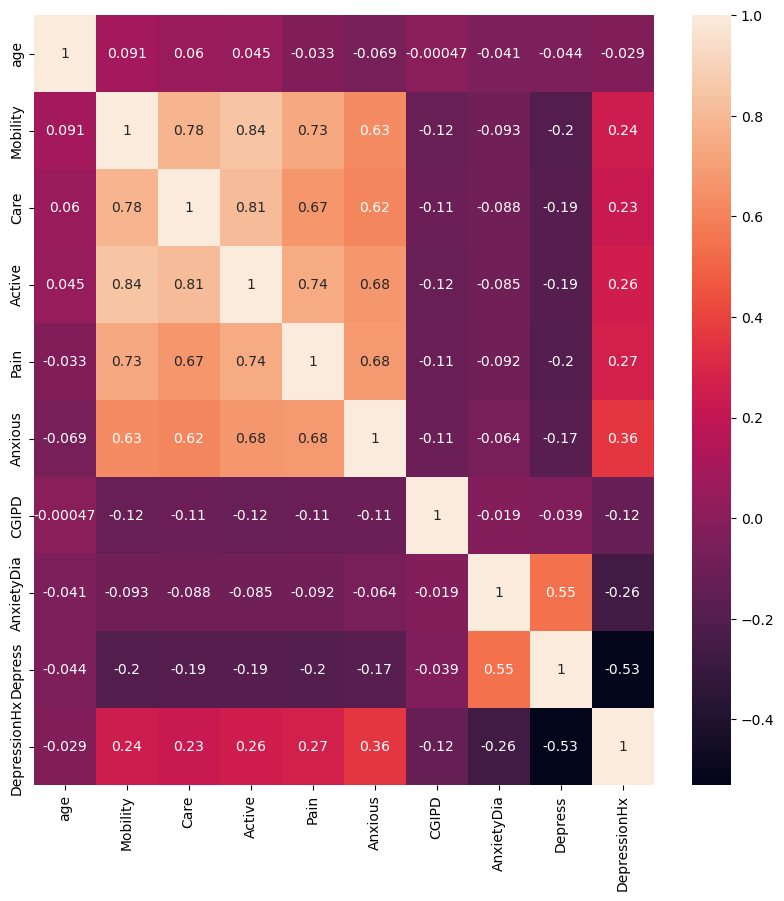

20 30


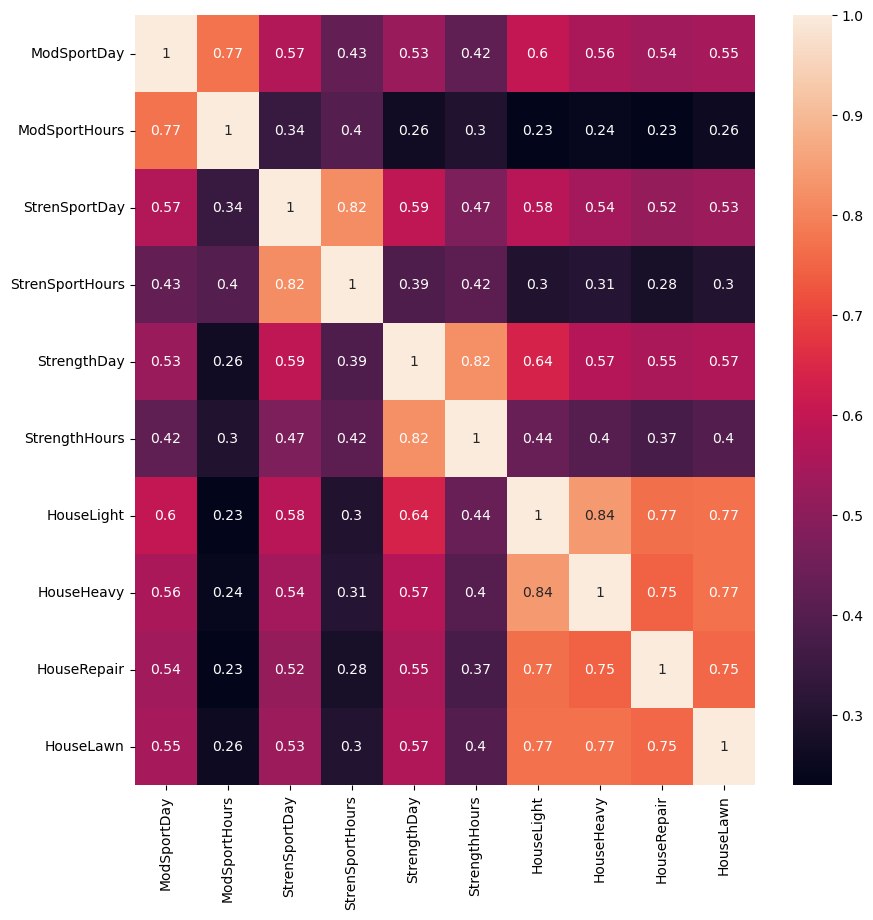

In [20]:
for i in range(0, len(df.columns), 20):
    col = df.columns[i:i+10]
    aux = df[col]
    print(i, i+10)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(data=aux.corr(),annot=True,) 
    plt.savefig("../assets/heatmap/heatmap2_" +str(i)+ ".jpg")
    plt.show() 

In [21]:
df.columns

Index(['age', 'Mobility', 'Care', 'Active', 'Pain', 'Anxious', 'CGIPD',
       'AnxietyDia', 'Depress', 'DepressionHx', 'DepressionHxTrt',
       'DepressionHxLim', 'AnxietyHx', 'AnxietyHxTrt', 'AnxietyHxLim',
       'LeisureHours', 'WalkDay', 'WalkHours', 'LightSportDay',
       'LightSportHours', 'ModSportDay', 'ModSportHours', 'StrenSportDay',
       'StrenSportHours', 'StrengthDay', 'StrengthHours', 'HouseLight',
       'HouseHeavy', 'HouseRepair', 'HouseLawn', 'HouseGarden', 'HouseCare',
       'Work', 'WorkActive', 'MindStress', 'MindAnxietyPDSympTremor',
       'MindAnxietyPDSympSleep', 'MindAnxietyPDSympOther', 'pa1a', 'pa7a'],
      dtype='object')

In [22]:
len(df.columns)

40

In [23]:
df.to_csv("../data/interim/filtered-corr.csv")